<a href="https://colab.research.google.com/github/DhivyaMadhavan/Retail_Sales_Prediction/blob/main/retail_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries,read the file

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler ## standrard scaling
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
final_data = pd.read_csv("/content/final_data.csv",encoding='utf-8')

In [ ]:
final_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,WeekOfYear,DayName
0,1,1,2010-05-02,24924,False,A,151315,42,2,0,0,0,0,0,211,8,2010,5,17,Sunday
1,1,2,2010-05-02,50605,False,A,151315,42,2,0,0,0,0,0,211,8,2010,5,17,Sunday
2,1,3,2010-05-02,13740,False,A,151315,42,2,0,0,0,0,0,211,8,2010,5,17,Sunday
3,1,4,2010-05-02,39954,False,A,151315,42,2,0,0,0,0,0,211,8,2010,5,17,Sunday
4,1,5,2010-05-02,32229,False,A,151315,42,2,0,0,0,0,0,211,8,2010,5,17,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420262,45,93,2012-10-26,2487,False,B,118221,58,3,4018,58,100,211,858,192,8,2012,10,43,Friday
420263,45,94,2012-10-26,5203,False,B,118221,58,3,4018,58,100,211,858,192,8,2012,10,43,Friday
420264,45,95,2012-10-26,56017,False,B,118221,58,3,4018,58,100,211,858,192,8,2012,10,43,Friday
420265,45,97,2012-10-26,6817,False,B,118221,58,3,4018,58,100,211,858,192,8,2012,10,43,Friday


In [ ]:
final_data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Year            0
Month           0
WeekOfYear      0
DayName         0
dtype: int64

In [ ]:
final_data.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,WeekOfYear,DayName
0,1,1,2010-05-02,24924,False,A,151315,42,2,0,0,0,0,0,211,8,2010,5,17,Sunday
1,1,2,2010-05-02,50605,False,A,151315,42,2,0,0,0,0,0,211,8,2010,5,17,Sunday


In [ ]:
final_data.corr()

<ipython-input-12-83294eb89516>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_data.corr()


,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,WeekOfYear
Store,1.000000,0.024282,-0.085197,-0.000547,-0.183048,-0.050830,0.047244,-0.060001,-0.033766,-0.020338,-0.042812,-0.012614,-0.211071,0.207499,0.002843,-0.000014,0.000010
Dept,0.024282,1.000000,0.148659,0.000659,-0.002536,0.004643,0.004551,0.001474,0.000420,0.001517,0.001900,0.002711,-0.007189,0.007866,0.003693,0.000877,0.000861
Weekly_Sales,-0.085197,0.148659,1.000000,0.012836,0.244052,-0.002547,0.001274,0.047209,0.020963,0.038516,0.037436,0.050540,-0.021150,-0.025520,-0.010020,0.024982,0.024419
IsHoliday,-0.000547,0.000659,0.012836,1.000000,0.000711,-0.156310,-0.024720,-0.003565,0.207293,0.266745,0.011586,-0.015231,-0.001807,0.013719,-0.056580,0.332688,0.329281
Size,-0.183048,-0.002536,0.244052,0.000711,1.000000,-0.059007,-0.007464,0.169797,0.078360,0.033634,0.127355,0.153110,-0.003888,-0.065935,-0.004727,-0.000255,-0.000397
Temperature,-0.050830,0.004643,-0.002547,-0.156310,-0.059007,1.000000,0.058735,-0.026775,-0.180253,-0.056268,-0.050798,-0.014943,0.184094,0.083903,0.065755,0.065395,0.072060
Fuel_Price,0.047244,0.004551,0.001274,-0.024720,-0.007464,0.058735,1.000000,0.267779,0.083732,0.035244,0.153887,0.234138,-0.142076,0.004221,0.722294,-0.040404,-0.028611
MarkDown1,-0.060001,0.001474,0.047209,-0.003565,0.169797,-0.026775,0.267779,1.000000,0.174968,-0.014462,0.838889,0.415130,0.011120,-0.106038,0.501043,-0.074864,-0.078028
MarkDown2,-0.033766,0.000420,0.020963,0.207293,0.078360,-0.180253,0.083732,0.174968,1.000000,-0.006106,0.113420,0.131772,-0.003345,-0.040882,0.131999,0.043163,0.046580
MarkDown3,-0.020338,0.001517,0.038516,0.266745,0.033634,-0.056268,0.035244,-0.014462,-0.006106,1.000000,-0.012057,0.042490,-0.006060,-0.019316,0.006774,0.098595,0.104817


It looks like  features 'Dept'and 'Size' have 14% and 24% correlation with Weekly_sales. The contribution of other features are comparatively low

<ipython-input-13-1e438e5453a6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_data.dropna().corr()['Weekly_Sales'].abs().sort_values()[:-1].plot(kind='bar');


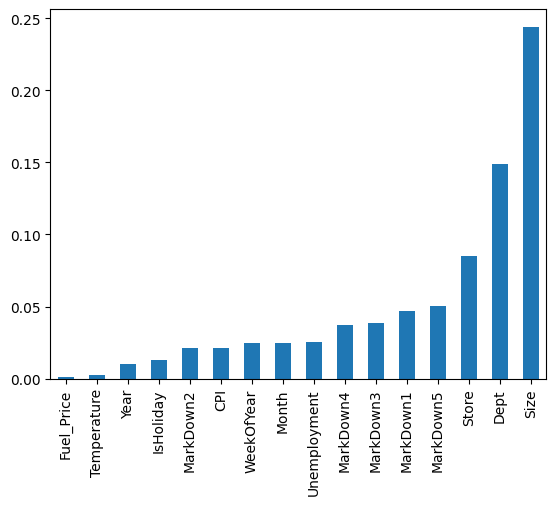

In [ ]:
final_data.dropna().corr()['Weekly_Sales'].abs().sort_values()[:-1].plot(kind='bar');

In [ ]:
#dropping a few features
final_data = final_data.drop(columns = ['Date','MarkDown1','MarkDown2','MarkDown4','MarkDown3','MarkDown5','CPI',
             'Unemployment','Temperature','Fuel_Price','DayName'] )

##Encoding the data

In [ ]:
final_data['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [ ]:
final_data['IsHoliday'].unique()

array([False,  True])

In [ ]:
#Encoding the catergorical column data - Type and IsHoliday

In [ ]:
final_data['Type'] = final_data['Type'].map({'A':2,'B':1,'C':0})

In [ ]:
final_data['IsHoliday'] = final_data['IsHoliday'].astype('str').map({'True':1,'False':0})

In [ ]:
final_data['Type'].unique()

array([2, 1, 0])

In [ ]:
final_data['IsHoliday'].unique()

array([0, 1])

#Predict the department-wide sales for each store for the following year

In [ ]:
task1_df = final_data.copy()

In [ ]:
task1_df

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Year,Month,WeekOfYear
0,1,1,24924,0,2,151315,2010,5,17
1,1,2,50605,0,2,151315,2010,5,17
2,1,3,13740,0,2,151315,2010,5,17
3,1,4,39954,0,2,151315,2010,5,17
4,1,5,32229,0,2,151315,2010,5,17
...,...,...,...,...,...,...,...,...,...
420262,45,93,2487,0,1,118221,2012,10,43
420263,45,94,5203,0,1,118221,2012,10,43
420264,45,95,56017,0,1,118221,2012,10,43
420265,45,97,6817,0,1,118221,2012,10,43


In [ ]:
#splitting the data
y = task1_df['Weekly_Sales']
X = task1_df.drop(['Weekly_Sales'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((336213, 8), (84054, 8), (336213,), (84054,))

In [ ]:
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data

In [ ]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    # fit the model
    model.fit(x_train, y_train)

    # predict the values using training data
    train_pred = model.predict(x_train)

    # predict the values using testing data
    test_pred = model.predict(x_test)

    # evaluate using testing data
    test_mae = mean_absolute_error(y_test, test_pred)
    test_r2score = r2_score(y_test, test_pred)

    # print the results of the testing data
    print("Results of the testing data\n")
    #print("Mean Absolute Error: {:.2f}".format(test_mae))
    #print("R2 Score: {:.2f}\n".format(test_r2score))

    test_score = pd.DataFrame([test_mae,test_r2score],columns=['score'],index=['MAE','R2 score'])

    print(test_score)
    return test_r2score, test_mae

In [ ]:
dtr = DecisionTreeRegressor(max_depth = 25)
dtr_testing_r2score, dtr_testing_mae = evaluate_model(dtr, X_train_scaled, y_train, X_test_scaled, y_test)



Results of the testing data

                score
MAE       2311.730767
R2 score     0.939431


In [ ]:
rf = RandomForestRegressor(n_estimators= 50, max_depth = 25)
rf_testing_r2score, rf_testing_mae = evaluate_model(rf, X_train_scaled, y_train, X_test_scaled, y_test)

Results of the testing data

                score
MAE       1953.269390
R2 score     0.959028


In [ ]:
knn = KNeighborsRegressor()
knn_testing_r2score,knn_testing_mae = evaluate_model(knn, X_train_scaled, y_train, X_test_scaled, y_test)


Results of the testing data

                 score
MAE       10049.484481
R2 score      0.470708


In [ ]:
xgb = XGBRegressor()
xgb_testing_r2score,xgb_testing_mae = evaluate_model(xgb, X_train_scaled, y_train, X_test_scaled, y_test)

Results of the testing data

                score
MAE       3060.650754
R2 score     0.937784


In [ ]:
models = pd.DataFrame({
    'Model': ["DecisionTreeRegressor", 'RandomForest Regression','KNeighbours Regression','XGBRegression' ],
    'R2_Score': [dtr_testing_r2score, rf_testing_r2score, knn_testing_r2score,xgb_testing_r2score],
    'MAE' : [dtr_testing_mae, rf_testing_mae, knn_testing_mae,xgb_testing_mae]
})
models.style.background_gradient(cmap='Blues')

,Model,R2_Score,MAE
0,DecisionTreeRegressor,0.939431,2311.730767
1,RandomForest Regression,0.959028,1953.269390
2,KNeighbours Regression,0.470708,10049.484481
3,XGBRegression,0.937784,3060.650754


RandomForestRegressor using all features gives the best result. So cross-validation and Hyper parameter tuning is done on this model to get the final prediction

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(RandomForestRegressor(), X, y, cv=4)
print(f"Average 4-Fold CV Score: {score.mean().round(4)}")

Average 4-Fold CV Score: 0.6966


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores_r2 = cross_val_score(rf, X, y, cv=kf, scoring='r2')

# Display the cross-validation R-squared scores
print("Cross-Validation R-squared Scores:", cv_scores_r2)

# Calculate the average R-squared score
avg_cv_score_r2 = cv_scores_r2.mean()
print("Average Cross-Validation R-squared Score:", avg_cv_score_r2)

Cross-Validation R-squared Scores: [0.95647912 0.95602606 0.95952304 0.95888746 0.95604283]
Average Cross-Validation R-squared Score: 0.9573917034133649


hyper parameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
random_grid = {'n_estimators': [50,60,70],
               'max_features': [3,4],
               'max_depth': [25,30,35],
               'min_samples_split': [3,4],
              'min_samples_leaf':[1,2]}

rf_grid = RandomizedSearchCV(RandomForestRegressor(),
                        random_grid,
                        cv = 4,
                        n_jobs = 5,
                        verbose=True)

rf_grid.fit(X,y)

print(rf_grid.best_score_)
print(rf_grid.best_params_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


0.7807131423583829
{'n_estimators': 50, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 3, 'max_depth': 25}


In [ ]:
X.columns

Index(['Store', 'Dept', 'IsHoliday', 'Type', 'Size', 'Year', 'Month',
       'WeekOfYear'],
      dtype='object')

In [ ]:
X.WeekOfYear.unique()

array([17, 48,  7,  8, 18, 11, 12,  5, 35, 15, 16, 27, 19, 20, 21, 14, 44,
       24, 25, 36, 28, 29, 30, 23, 32, 33, 34, 10, 40, 37, 38,  1, 41, 42,
       43, 49, 46, 47, 50, 51, 52, 26,  2,  3,  4, 13, 31, 22,  9,  6, 39,
       45])

In [ ]:
rf_predict_sales = rf.predict(np.array([[45,95,1,1,118221,2013,11,43]]))
dtr_predict_sales = dtr.predict(np.array([[45,95,1,1,118221,2013,11,43]]))
knn_predict_sales = knn.predict(np.array([[45,95,1,1,118221,2013,11,43]]))
xgb_predict_sales = xgb.predict(np.array([[45,95,1,1,118221,2013,11,43]]))


In [ ]:
prediction = pd.DataFrame({
    'Model': ["DecisionTreeRegressor", 'RandomForest Regression','KNeighbours Regression','XGBRegression' ],
    'Weekly_Sales_Prediction':[*dtr_predict_sales,*rf_predict_sales,*knn_predict_sales,*xgb_predict_sales]
})
prediction.style.background_gradient(cmap='Greens')

,Model,Weekly_Sales_Prediction
0,DecisionTreeRegressor,230.000000
1,RandomForest Regression,218.400000
2,KNeighbours Regression,20466.600000
3,XGBRegression,-10214.877930


Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

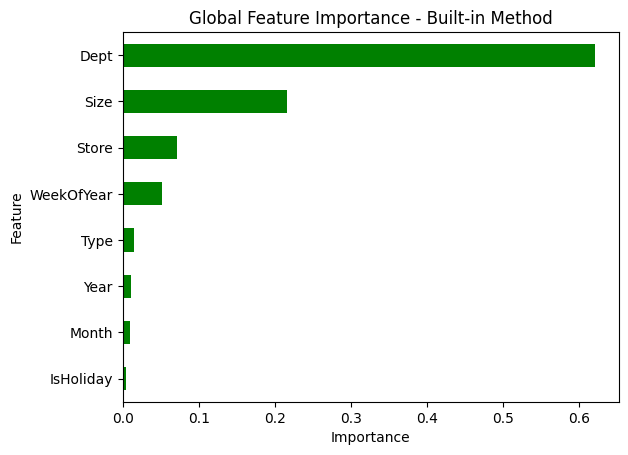

In [ ]:
global_importances = pd.Series(rf.feature_importances_, index= ['Store', 'Dept', 'IsHoliday', 'Type', 'Size', 'Year', 'Month',
       'WeekOfYear'])
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")